In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from os import listdir
from os.path import isfile, join
from os import getcwd

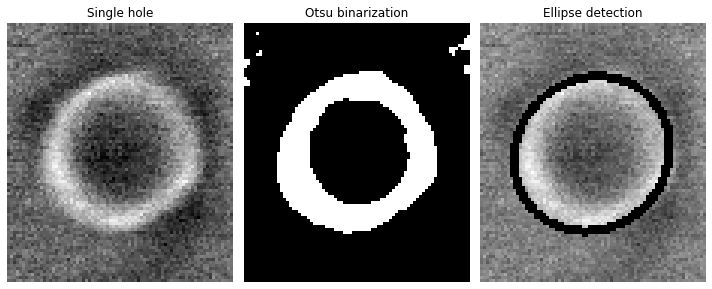

In [3]:
img = cv2.imread('simple_test.png', 0)
blur = cv2.GaussianBlur(img,(5,5),0)
ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[2]
M = cv2.moments(cnt)

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Single hole')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(thresh, 'gray')
plt.title('Otsu binarization')

plt.subplot(1, 3, 3)
ellipse = cv2.fitEllipse(cnt)
#ellipse0 = cv2.fitEllipse(contours[0])
img = cv2.ellipse(img,ellipse,(0,255,0),2)
#img = cv2.ellipse(img,ellipse0,(0,255,0),2)
plt.imshow(img, 'gray')
plt.axis('off')
plt.tight_layout()
plt.title('Ellipse detection')

plt.savefig('EllipseDetection.png', facecolor='white')

59

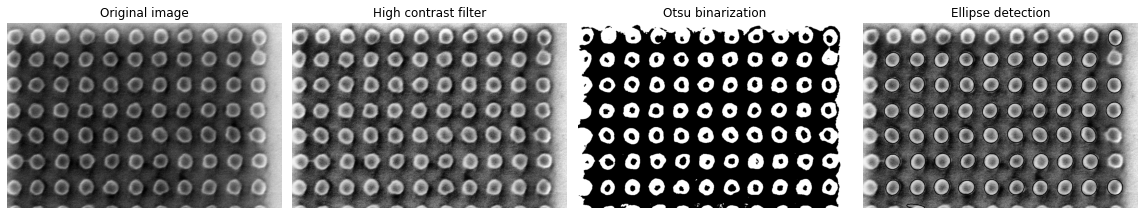

In [4]:
img = cv2.imread('30x30_11.png', 0)

plt.figure(figsize=(16, 4))
############################
#Original image
############################
plt.subplot(1, 4, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
############################
#Constrast filter
############################

clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))
img = clahe.apply(img) 
plt.subplot(1, 4, 2)
plt.imshow(img, 'gray')
plt.axis('off')
plt.title('High contrast filter')

############################
#Threshold and Otsu binarization
############################
blur = cv2.GaussianBlur(img,(5,5),10)
ret, thresh = cv2.threshold(blur,150,2000,cv2.THRESH_BINARY
                            +cv2.THRESH_OTSU
                           )
contours,hierarchy = cv2.findContours(thresh, 1, 2)

plt.subplot(1, 4, 3)
plt.axis('off')
plt.imshow(thresh, 'gray')
plt.title('Otsu binarization')

###########################
#Ellipse detection and saving
###########################

perimeters = []
ellipses = []
eccentricities = []
for i, cnt in enumerate(contours):
    if (len(cnt) > 4) and (150 < cv2.arcLength(cnt,True) < 450):
        ellipse = cv2.fitEllipse(cnt)
        #ellipse0 = cv2.fitEllipse(contours[0])
        img = cv2.ellipse(img , ellipse,(0,255,0),2)
        #img = cv2.ellipse(img,ellipse0,(0,255,0),2)
        perimeters.append(cv2.arcLength(cnt,True))
        ellipses.append(ellipse)
        eccentricities.append(min(ellipse[1])/max(ellipse[1]))

plt.subplot(1, 4, 4)
plt.imshow(img, 'gray')
plt.axis('off')
plt.title('Ellipse detection')

plt.tight_layout()
len(perimeters)

Text(0.5, 0, 'Ellipse eccentricities')

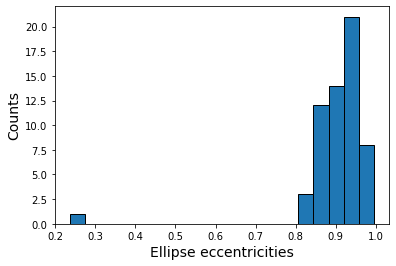

In [5]:
plt.hist(x = eccentricities, bins=20, lw=1, ec='black')
plt.ylabel('Counts', size=14)
plt.xlabel('Ellipse eccentricities', size=14)

In [104]:
def ellipseFitting(filename, minAx, maxAx, highContrast=False):
    img = cv2.imread(filename, 0)

    plt.figure(figsize=(16, 4))
    ############################
    #Original image
    ############################
    plt.subplot(1, 4, 1)
    plt.axis('off')
    plt.imshow(img, 'gray')
    plt.title('Original image')
    ############################
    #Constrast filter
    ############################

    if highContrast:
        clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))
        img = clahe.apply(img) 
    plt.subplot(1, 4, 2)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title('High contrast filter')

    ############################
    #Threshold and Otsu binarization
    ############################
    blur = cv2.GaussianBlur(img,(5,5),10)
    ret, thresh = cv2.threshold(blur,150,2000,cv2.THRESH_BINARY
                                +cv2.THRESH_OTSU
                               )
    contours,hierarchy = cv2.findContours(thresh, 1, 2)

    plt.subplot(1, 4, 3)
    plt.axis('off')
    plt.imshow(thresh, 'gray')
    plt.title('Otsu binarization')

    ###########################
    #Ellipse detection and saving
    ###########################

    perimeters = []
    ellipses = []
    eccentricities = []
    for i, cnt in enumerate(contours):
        if (len(cnt) > 4)  and \
        ( (min(cv2.fitEllipse(cnt)[1]) > minAx) and (max(cv2.fitEllipse(cnt)[1]) < maxAx) ):
            ellipse = cv2.fitEllipse(cnt)
            #ellipse0 = cv2.fitEllipse(contours[0])
            img = cv2.ellipse(img , ellipse,(255,0,0),2)
            #img = cv2.ellipse(img,ellipse0,(0,255,0),2)
            perimeters.append(cv2.arcLength(cnt,True))
            ellipses.append(ellipse)
            eccentricities.append(np.sqrt(1-min(ellipse[1])**2/max(ellipse[1])**2))

    plt.subplot(1, 4, 4)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title('Ellipse detection')

    plt.tight_layout()
    plt.suptitle(filename, size=18)
    #plt.savefig('EllipseFit_{}'.format(filename), facecolor='white')
    print(len(perimeters))
    return(eccentricities)

58


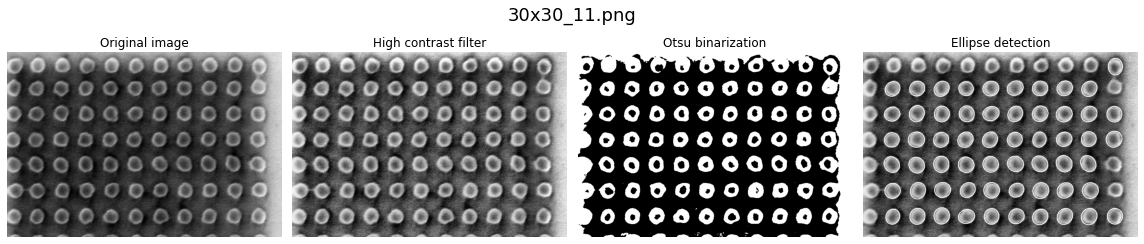

In [105]:
thirty=ellipseFitting('30x30_11.png', minAx=40, maxAx=100, highContrast=True)


41


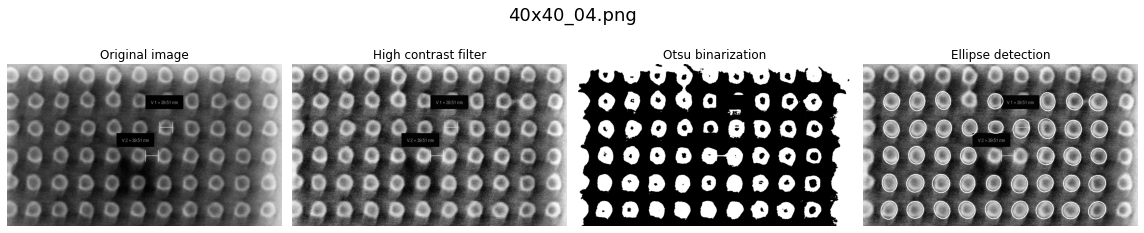

In [106]:
forty=ellipseFitting('40x40_04.png', minAx=35, maxAx=100, highContrast=True)

61


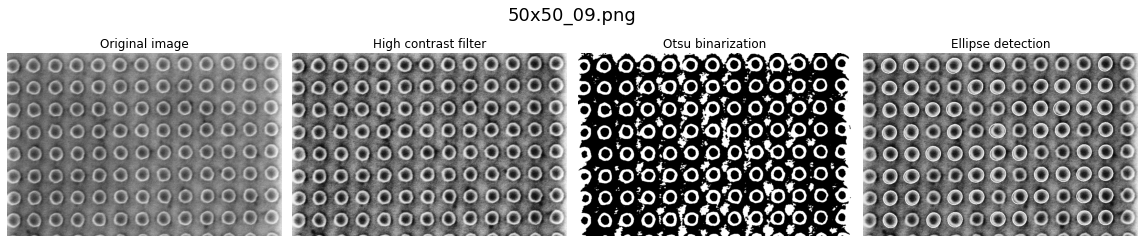

In [107]:
fifty=ellipseFitting('50x50_09.png', minAx=40, maxAx=60, highContrast=True)

53


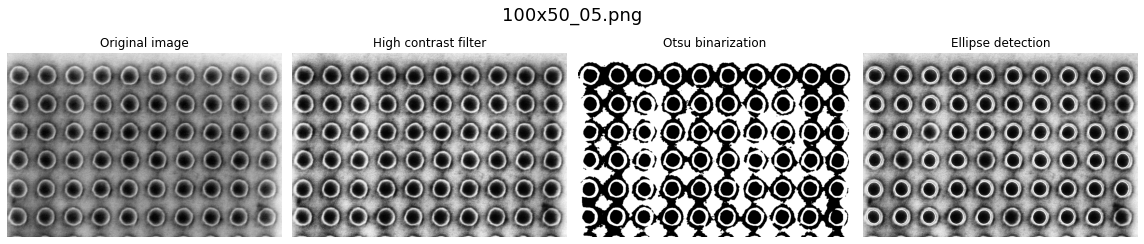

In [108]:
hundred=ellipseFitting('100x50_05.png', minAx=45, maxAx=55, highContrast=True)

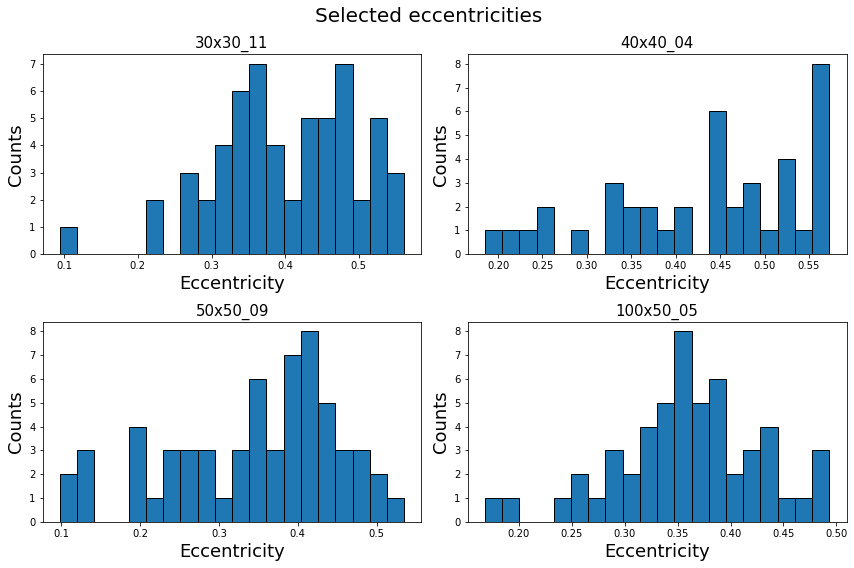

In [109]:
plt.figure(figsize=(12, 8))

########################
plt.subplot(2, 2, 1)

plt.hist(thirty, bins=20, lw=1, ec='black')
plt.ylabel('Counts', size=18)
plt.xlabel('Eccentricity', size=18)
plt.title('30x30_11', size=15)

########################
plt.subplot(2, 2, 2)

plt.hist(forty, bins=20, lw=1, ec='black')
plt.ylabel('Counts', size=18)
plt.xlabel('Eccentricity', size=18)
plt.title('40x40_04', size=15)

########################
plt.subplot(2, 2, 3)

plt.hist(fifty, bins=20, lw=1, ec='black')
plt.ylabel('Counts', size=18)
plt.xlabel('Eccentricity', size=18)
plt.title('50x50_09', size=15)

########################
plt.subplot(2, 2, 4)

plt.hist(hundred, bins=20, lw=1, ec='black')
plt.ylabel('Counts', size=18)
plt.xlabel('Eccentricity', size=18)
plt.title('100x50_05', size=15)

#########################
plt.suptitle('Selected eccentricities', size=20)

plt.tight_layout()
plt.savefig('selectedEccentricities.png', facecolor='white')

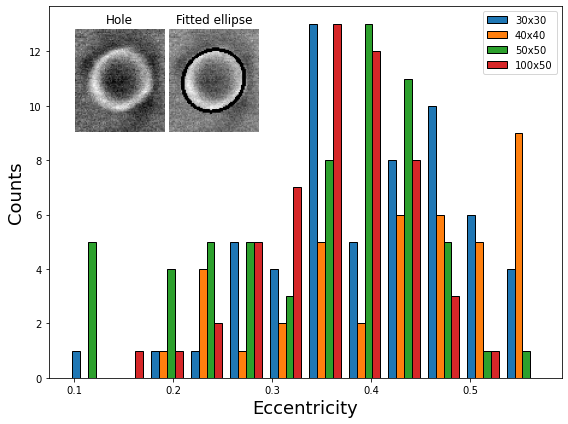

In [110]:
fig, ax = plt.subplots(figsize=(8, 6))

#########################
# Histogram
#########################

ax.hist(x = [thirty, forty, fifty, hundred], bins=12, lw=1, ec='black', label=['30x30', '40x40', '50x50', '100x50'])
ax.set_ylabel('Counts', size=18)
ax.set_xlabel('Eccentricity', size=18)

#########################
# Inset
#########################
img = cv2.imread('simple_test.png', 0)
blur = cv2.GaussianBlur(img,(5,5),0)
ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[2]
M = cv2.moments(cnt)

axin = ax.inset_axes([0.05, 0.65, 0.35/2, 0.3])
#axin.imshow()
#axin.axis('off')
axin.axis('off')
axin.imshow(img, 'gray')
axin.set_title('Hole')

ellipse = cv2.fitEllipse(cnt)
img = cv2.ellipse(img,ellipse,(0,255,0),2)
axin2 = ax.inset_axes([0.05+0.35/2+0.01, 0.65, 0.35/2, 0.3])
axin2.imshow(img, 'gray')
axin2.axis('off')
axin2.set_title('Fitted ellipse')

plt.legend()

plt.tight_layout()
plt.savefig('EccencricityEval_30-40-50-100.png', facecolor='white')

In [85]:
def ellipseFitting(filename, minAx, maxAx, highContrast=False):
    img = cv2.imread(filename, 0)

    plt.figure(figsize=(16, 4))
    ############################
    #Original image
    ############################
    plt.subplot(1, 4, 1)
    plt.axis('off')
    plt.imshow(img, 'gray')
    plt.title('Original image')
    ############################
    #Constrast filter
    ############################

    if highContrast:
        clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))
        img = clahe.apply(img) 
    plt.subplot(1, 4, 2)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title('High contrast filter')

    ############################
    #Threshold and Otsu binarization
    ############################
    blur = cv2.GaussianBlur(img,(5,5),10)
    ret, thresh = cv2.threshold(blur,150,2000,cv2.THRESH_BINARY
                                +cv2.THRESH_OTSU
                               )
    contours,hierarchy = cv2.findContours(thresh, 1, 2)

    plt.subplot(1, 4, 3)
    plt.axis('off')
    plt.imshow(thresh, 'gray')
    plt.title('Otsu binarization')

    ###########################
    #Ellipse detection and saving
    ###########################

    perimeters = []
    ellipses = []
    aspect_ratios = []
    for i, cnt in enumerate(contours):
        if (len(cnt) > 4)  and \
        ( (min(cv2.fitEllipse(cnt)[1]) > minAx) and (max(cv2.fitEllipse(cnt)[1]) < maxAx) ):
            ellipse = cv2.fitEllipse(cnt)
            #ellipse0 = cv2.fitEllipse(contours[0])
            img = cv2.ellipse(img , ellipse,(255,0,0),2)
            #img = cv2.ellipse(img,ellipse0,(0,255,0),2)
            perimeters.append(cv2.arcLength(cnt,True))
            ellipses.append(ellipse)
            aspect_ratios.append(min(ellipse[1])/max(ellipse[1]))

    plt.subplot(1, 4, 4)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title('Ellipse detection')

    plt.tight_layout()
    plt.suptitle(filename, size=18)
    plt.savefig('EllipseFit_{}'.format(filename), facecolor='white')
    print(len(perimeters))
    return(aspect_ratios)

58


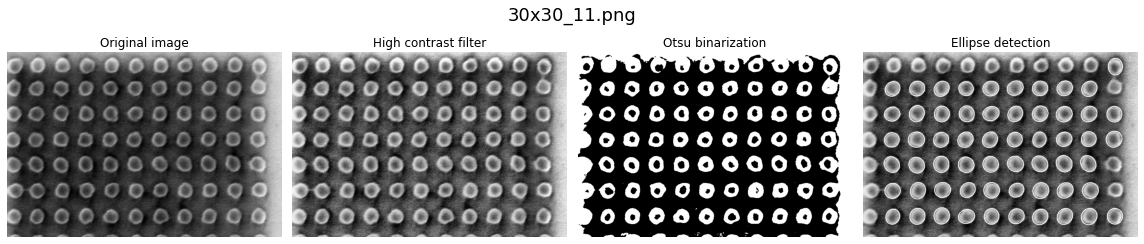

In [86]:
thirty=ellipseFitting('30x30_11.png', minAx=40, maxAx=100, highContrast=True)


41


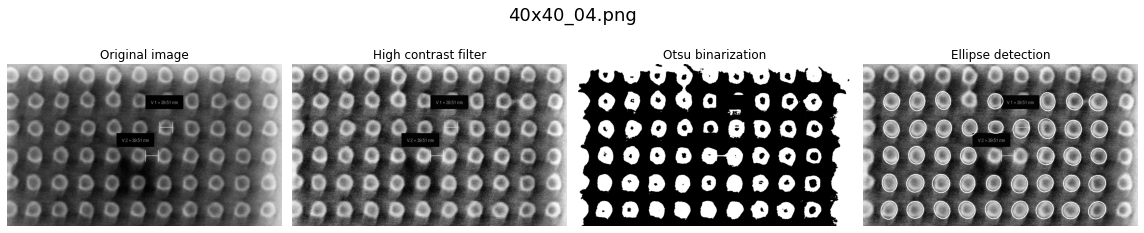

In [87]:
forty=ellipseFitting('40x40_04.png', minAx=35, maxAx=100, highContrast=True)

61


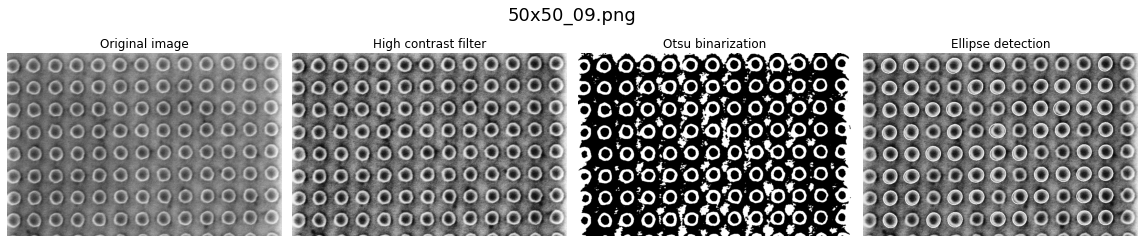

In [88]:
fifty=ellipseFitting('50x50_09.png', minAx=40, maxAx=60, highContrast=True)

53


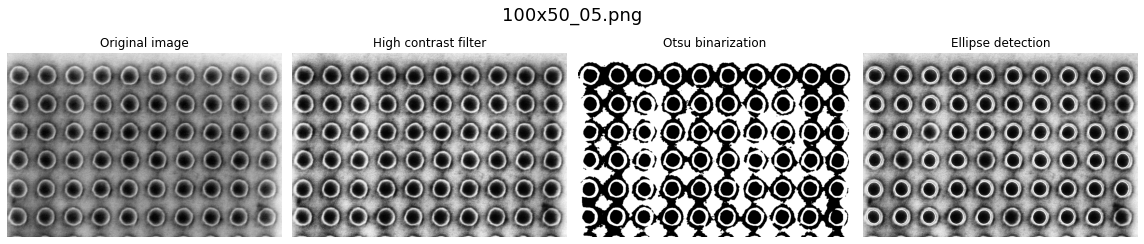

In [89]:
hundred=ellipseFitting('100x50_05.png', minAx=45, maxAx=55, highContrast=True)

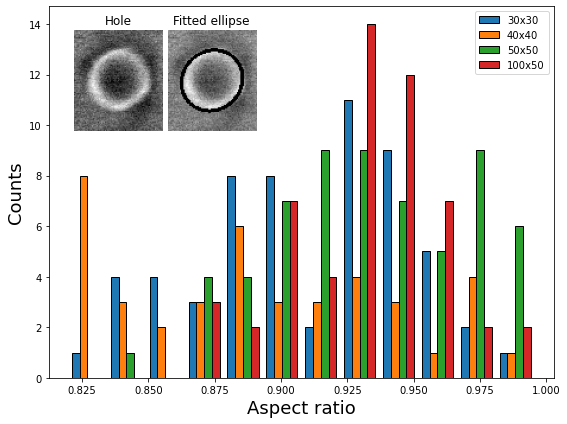

In [78]:
fig, ax = plt.subplots(figsize=(8, 6))

#########################
# Histogram
#########################

ax.hist(x = [thirty, forty, fifty, hundred], bins=12, lw=1, ec='black', label=['30x30', '40x40', '50x50', '100x50'])
ax.set_ylabel('Counts', size=18)
ax.set_xlabel('Aspect ratio', size=18)

#########################
# Inset
#########################
img = cv2.imread('simple_test.png', 0)
blur = cv2.GaussianBlur(img,(5,5),0)
ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[2]
M = cv2.moments(cnt)

axin = ax.inset_axes([0.05, 0.65, 0.35/2, 0.3])
#axin.imshow()
#axin.axis('off')
axin.axis('off')
axin.imshow(img, 'gray')
axin.set_title('Hole')

ellipse = cv2.fitEllipse(cnt)
img = cv2.ellipse(img,ellipse,(0,255,0),2)
axin2 = ax.inset_axes([0.05+0.35/2+0.01, 0.65, 0.35/2, 0.3])
axin2.imshow(img, 'gray')
axin2.axis('off')
axin2.set_title('Fitted ellipse')

plt.legend()

plt.tight_layout()
plt.savefig('AspectRatio_30-40-50-100.png', facecolor='white')

In [56]:
np.savetxt(fname='thirty.csv', X=thirty)
np.savetxt(fname='forty.csv', X=forty)
np.savetxt(fname='fifty.csv', X=fifty)
np.savetxt(fname='hundred.csv', X=hundred)